In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Агригированная информация по университетам «Приоритет 2030»

Коллеги из Социоцентра создали очень крутой раздел с [аналитикой по университетам](https://priority2030.ru/analytics/), где можно посмотреть программы развития участников прогрраммы и посмотреть всякие циферки 🤗

Возникло сразу естественное желание изучить университеты в сравнении друг с другом, построить всякие графики или ещё что-то… UI сайта программы скорей про конкретный цифры, по конкретному университету, поэтому позаимствуем данные коллег из Социоцентра для создания своих производных навправленных на общее благо.

## Формируем данные

На **первом этапе** [забираем](https://github.com/psalru/analytics/blob/8a0b2604b09aa6527eb3eae35870725c7aa15fd9/combined_analytics_data/save_university.py) и сохраняем [перечень университетов](https://github.com/psalru/analytics/blob/8a0b2604b09aa6527eb3eae35870725c7aa15fd9/combined_analytics_data/data/university.csv), которые как-то связанны с программой «Приоритет 2030». Получаем табличку, со следующими столбцами:

* **id** — какой-то внутренний идентификатор университета
* **name** — полное название университета
* **shortName** — краткое название университета (его дальше и использую)
* **group** — идентификатор группы (не понял, что это 🤷‍)
* **location** — субъект Российской Федерации
* **city** — город
* **founder** — ведомственная принадлежность
* **region** — регион
* **isBase** — признак базовой части гранта
* **isSpecial** — признак специальной части гранта
* **isCandidate** — признак кандидата
* **special** — категория из области специальной части гранта
* **regionCode** — какой-то код округа, видимо что-то для карты и фильтров на [данной странице](https://priority2030.ru/analytics/)

In [14]:
university = pd.read_csv('data/university.csv')
university.head(10)

,id,name,shortName,group,location,city,founder,region,isBase,isSpecial,isCandidate,special,regionCode
0,u1dpt3iyms,Федеральное государственное бюджетное образова...,АГУ,1,Республика Адыгея,Майкоп,Министерство науки и высшего образования Росси...,Южный,True,False,False,NaN,south
1,8zd4kctsoz,Федеральное государственное бюджетное образова...,Академия Русского балета имени А.Я. Вагановой,2,Санкт-Петербург,Санкт-Петербург,Министерство культуры Российской Федерации,Северо-Западный,True,False,False,NaN,north
2,ctiqcaywqm,Федеральное государственное бюджетное образова...,АлтГУ,1,Алтайский край,Барнаул,Министерство науки и высшего образования Росси...,Сибирский,True,False,False,NaN,siberia
3,sisytkom7x,Федеральное государственное бюджетное образова...,АмГУ,3,Амурская область,Благовещенск,Министерство науки и высшего образования Росси...,Дальневосточный,False,False,True,NaN,vostok
4,chokaxj6xy,Федеральное государственное бюджетное образова...,АГУ,4,Астраханская область,Астрахань,Министерство науки и высшего образования Росси...,Южный,True,False,False,NaN,south
5,wmyddq5cst,Федеральное государственное автономное образов...,БФУ им. И. Канта,1,Калининградская область,Калининград,Министерство науки и высшего образования Росси...,Северо-Западный,True,True,False,Территориальное/отраслевое лидерство,north
6,59rlnpjpsk,Федеральное государственное бюджетное образова...,ФГБОУ ВО БГМУ Минздрава России,1,Республика Башкортостан,Уфа,Министерство здравоохранения Российской Федерации,Приволжский,True,True,False,Территориальное/отраслевое лидерство,volga
7,la5zy15hzd,Федеральное государственное бюджетное образова...,БашГУ,1,Республика Башкортостан,Уфа,Министерство науки и высшего образования Росси...,Приволжский,True,True,False,Территориальное/отраслевое лидерство,volga
8,h0zsw2fc5f,Федеральное государственное автономное образов...,НИУ «БелГУ»,1,Белгородская область,Белгород,Министерство науки и высшего образования Росси...,Центральный,True,True,False,Территориальное/отраслевое лидерство,central
9,augafldhak,Федеральное государственное бюджетное образова...,БГТУ им. В.Г. Шухова,1,Белгородская область,Белгород,Министерство науки и высшего образования Росси...,Центральный,True,False,False,NaN,central


На **втором этапе** [получаем](https://github.com/psalru/analytics/blob/8a0b2604b09aa6527eb3eae35870725c7aa15fd9/combined_analytics_data/save_university_data.py) уже больше помучаем сайт и заберём [json-чики](https://github.com/psalru/analytics/blob/8a0b2604b09aa6527eb3eae35870725c7aa15fd9/combined_analytics_data/data/university_data) по каждому университету, для дальнейшего объединения данных в одну таблицу.

На **третьем этапе** [объединим](https://github.com/psalru/analytics/blob/8a0b2604b09aa6527eb3eae35870725c7aa15fd9/combined_analytics_data/save_result.py) всё в одну [большую таблицу](https://github.com/psalru/analytics/blob/8a0b2604b09aa6527eb3eae35870725c7aa15fd9/combined_analytics_data/data/result.csv), со следующими оговорками:

1. Самое важно, что так как мы ограниченны форматом таблицы, мне пришлось формировать «плоские» данные в место исходных иерархических, что привело к формированию довольно длинных заголовков столбцов учитывающих иерархию через «/» (например «Образовательная политика / Численность обучающихся по уровням образования (очно) / Специалитет»).
2. В данных, которые распределены по времени я использую только последний элемент имеющийся в данных (на дату написания этого материалы 28.12.2021, это 2021 год).
3. Данные «Динамика университета в международных институциональных рейтингах» я вообще проигнорировал, т.к. тематик много, их учёт приводил к колоссальному раздуванию конечной таблицы, а пересечений было не так много.

Список получившихся данных выглядит следующим образом:

In [32]:
df = pd.read_csv('data/result.csv')
pd.Series(df.columns)

0                                 Название университета
1                                                Регион
2                                            Субъект РФ
3                                                 Город
4                                             Ведомство
                            ...                        
60    Качество системы управления / Численность рабо...
61    Качество системы управления / Численность рабо...
62    Глобальная конкурентоспособность / Динамика ун...
63    Глобальная конкурентоспособность / Динамика ун...
64    Глобальная конкурентоспособность / Динамика ун...
Length: 65, dtype: object

In [16]:
df.head(10)

,Название университета,Регион,Субъект РФ,Город,Ведомство,Базовая часть,Спец. часть,Кандидат,Сайт,Ректор,...,Качество системы управления / Бюджет университета / Местный бюджет и внебюджетные средства,Качество системы управления / Финансовая модель организации («Модель 40/30/30») / Бюджетное финансирование,"Качество системы управления / Финансовая модель организации («Модель 40/30/30») / Внебюджетные доходы, связанные с выполнением НИР и ОКР, а также оказания услуг",Качество системы управления / Финансовая модель организации («Модель 40/30/30») / Внебюджетные доходы от образовательной деятельности (внебюджетные),Качество системы управления / Численность работников университета по категориям персонала / НР и инженерно-технический персонал,Качество системы управления / Численность работников университета по категориям персонала / ППС,"Качество системы управления / Численность работников университета по категориям персонала / Административно-хозяйственный, производственный и прочий персонал",Глобальная конкурентоспособность / Динамика университета в международных институциональных рейтингах / QS,Глобальная конкурентоспособность / Динамика университета в международных институциональных рейтингах / THE,Глобальная конкурентоспособность / Динамика университета в международных институциональных рейтингах / ARWU
0,АГУ,Южный,Республика Адыгея,Майкоп,Министерство науки и высшего образования Росси...,True,NaN,False,http://asu.edu.ru,Маркелов Константин Алексеевич,...,33.38,56.73,1.84,41.43,5.92,46.44,47.64,NaN,NaN,NaN
1,Академия Русского балета имени А.Я. Вагановой,Северо-Западный,Санкт-Петербург,Санкт-Петербург,Министерство культуры Российской Федерации,True,NaN,False,http://www.vaganovaacademy.ru,Цискаридзе Николай Максимович,...,13.25,83.99,0.57,15.44,7.20,38.56,54.24,NaN,NaN,NaN
2,АлтГУ,Сибирский,Алтайский край,Барнаул,Министерство науки и высшего образования Росси...,True,NaN,False,http://www.asu.ru/,Бочаров Сергей Николаевич,...,42.20,58.43,7.08,34.49,11.76,35.41,52.84,561.0,NaN,NaN
3,АмГУ,Дальневосточный,Амурская область,Благовещенск,Министерство науки и высшего образования Росси...,False,NaN,True,http://www.amursu.ru,Плутенко Андрей Долиевич,...,34.20,60.15,9.28,30.57,4.89,39.15,55.95,NaN,NaN,NaN
4,АГУ,Южный,Астраханская область,Астрахань,Министерство науки и высшего образования Росси...,True,NaN,False,http://asu.edu.ru,Маркелов Константин Алексеевич,...,33.38,56.73,1.84,41.43,5.92,46.44,47.64,NaN,NaN,NaN
5,БФУ им. И. Канта,Северо-Западный,Калининградская область,Калининград,Министерство науки и высшего образования Росси...,True,Территориальное/отраслевое лидерство,False,http://www.kantiana.ru,Федоров Александр Александрович,...,26.32,69.70,8.79,21.51,16.07,36.64,47.30,651.0,1201.0,NaN
6,ФГБОУ ВО БГМУ Минздрава России,Приволжский,Республика Башкортостан,Уфа,Министерство здравоохранения Российской Федерации,True,Территориальное/отраслевое лидерство,False,http://bashgmu.ru,Павлов Валентин Николаевич,...,57.76,58.84,2.18,38.98,3.52,53.65,42.83,NaN,NaN,NaN
7,БашГУ,Приволжский,Республика Башкортостан,Уфа,Министерство науки и высшего образования Росси...,True,Территориальное/отраслевое лидерство,False,http://www.bashedu.ru,Морозкин Николай Данилович,...,41.82,58.64,4.50,36.86,5.24,47.12,47.65,NaN,1201.0,NaN
8,НИУ «БелГУ»,Центральный,Белгородская область,Белгород,Министерство науки и высшего образования Росси...,True,Территориальное/отраслевое лидерство,False,http://www.bsu.edu.ru,Полухин Олег Николаевич,...,50.44,49.07,16.78,34.14,9.33,45.46,45.21,1001.0,1201.0,NaN
9,БГТУ им. В.Г. Шухова,Центральный,Белгородская область,Белгород,Министерство науки и высшего образования Росси...,True,NaN,False,http://www.bstu.ru,Глаголев Сергей Николаевич,...,41.11,58.40,15.87,25.73,9.98,43.41,46.62,NaN,NaN,NaN


## Немного аналитики на полученных данных

Давайте посмотрим медиану по трём показателям по регионам:

In [20]:
df.groupby(by='Регион', dropna=True)[
    'Научно-исследовательская политика / Общее число публикаций за период 2016-2020 (Scopus)',
    'Образовательная политика / Средний балл ЕГЭ / Средний балл ЕГЭ – студенты (Бюджет)',
    'Образовательная политика / Средний балл ЕГЭ /  Средний балл ЕГЭ – студенты (Контракт)'
].median()

<ipython-input-20-c332721af85a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='Регион', dropna=True)[


,Научно-исследовательская политика / Общее число публикаций за период 2016-2020 (Scopus),Образовательная политика / Средний балл ЕГЭ / Средний балл ЕГЭ – студенты (Бюджет),Образовательная политика / Средний балл ЕГЭ / Средний балл ЕГЭ – студенты (Контракт)
Регион,,,
Дальневосточный,594.0,65.630,60.160
Приволжский,1456.0,71.595,63.955
Северо-Западный,1007.0,78.855,70.255
Северо-Кавказский,738.0,63.800,61.815
Сибирский,1804.0,69.780,62.590
Уральский,582.0,75.650,61.200
Центральный,1328.5,80.785,66.350
Южный,973.0,67.110,62.110


Посмотрим на распределение «QI и QII (Scopus)»:

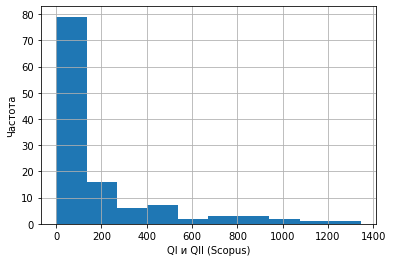

In [21]:
df['Научно-исследовательская политика / Число публикаций отнесенных к QI и QII (Scopus)'].hist(bins=10)
plt.xlabel('QI и QII (Scopus)')
plt.ylabel('Частота')
plt.show()

Напоследок посмотрим на первые 10 университетов по рейтингу THE:

In [31]:
df[[
    'Название университета',
    'Глобальная конкурентоспособность / Динамика университета в международных институциональных рейтингах / THE'
]].dropna().sort_values(by='Глобальная конкурентоспособность / Динамика университета в международных институциональных рейтингах / THE').head(10)

,Название университета,Глобальная конкурентоспособность / Динамика университета в международных институциональных рейтингах / THE
31,МФТИ,201.0
56,Санкт-Петербургский политехнический университе...,301.0
12,НИУ ВШЭ,301.0
34,НИЯУ МИФИ,401.0
14,СПГУ,401.0
96,РЭУ им. Г.В. Плеханова,501.0
16,ДГТУ,501.0
67,ТГУ,601.0
69,ТГУ,601.0
77,ИТМО,601.0
